Assignment: SIS6117

Lecturer: Dr Nuzah Gooda Sahib

Student ID: 2023151

Studen Name: Virikshit SEMBHOO

# **Work Scenario:**

Working in a manufacturing company which uses the make to order production approach means that each order has its own specificities. The company we are looking at, produces garments for its customers. The process of order confirmation starts with a customer contact. The customer shares his/her ideas to the marketing and design team. Then some plans, patterns and designs will be created based on what has been agreed with the customer and a sample of the actual garment will be produced. When the sample is ready the customer can check it and either return it with some comments or approve it and place an order. If sample returns with comments, changes will be applied and a new sample will be sent again to customer and customer can accept, reject or return again with more comments. This process goes on until order is confirmed or all samples or rejected and no order is received.



# SOP for sample to become confirmed orders

Below is a flow chart that illustrates the business process.

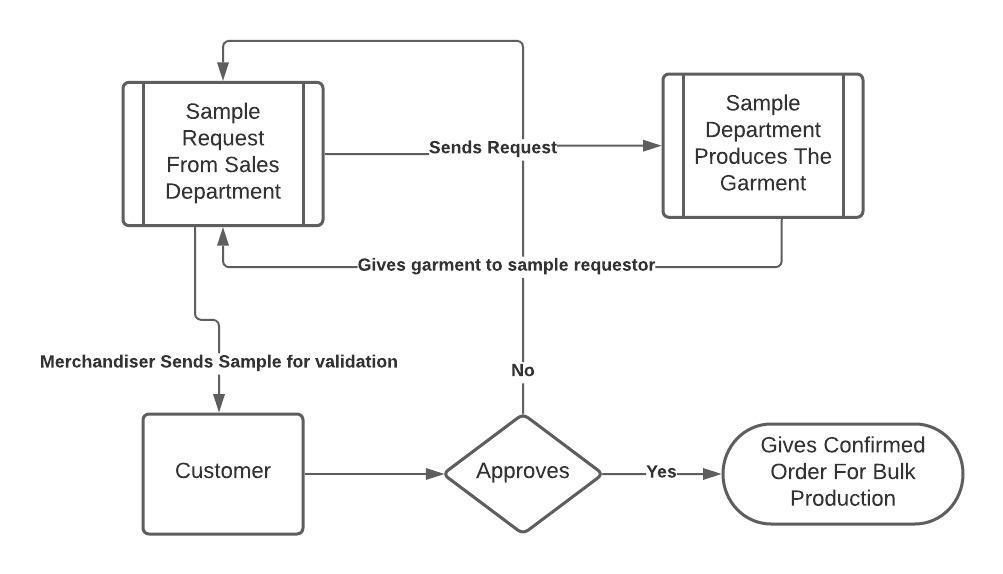


# The data set that was used for this assignment
Below is the interface used by merchandisers to request samples from sampling department. Data used in this assignment was extracted from an Oracle Database that contains all information about the samples.
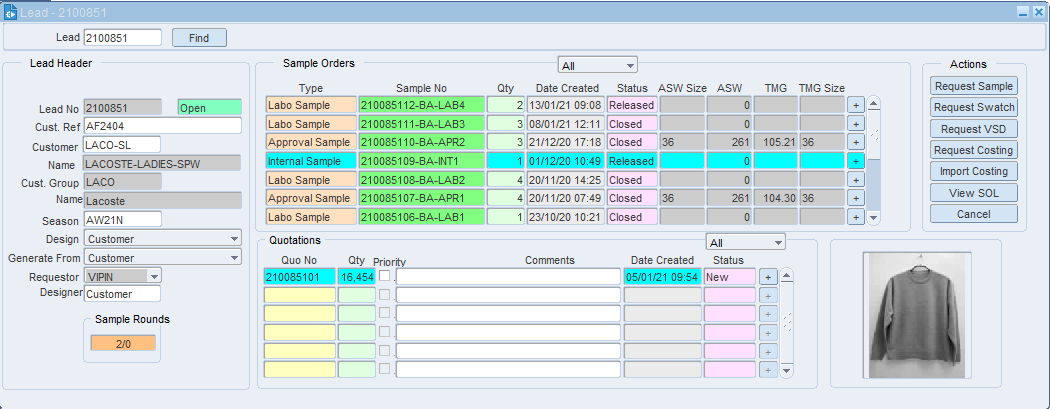


# Goal for the scenario selected
Classifiers will be use to check if it is possible to predict if a sample will be confirm and if we will receive the order. After using the classifier, confusion matrix and evaluation metrics will be ouput, so that best decision can be taken on which model is the best.

# Loading of the data
Data was extracted in csv format from an Oracle database. File was named sample_success.csv. Below is code data loading process.

In [392]:
#loading sample_success.csv using pandas
#importing necessary libraries for data loading,data visualisation and for mathematical functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to make sure all plots plotted in this jupiter notebook itself
%matplotlib inline

In [393]:
#import data from csv file
df = pd.read_csv('sample_success.csv')
df.head()

,DATE_CREATED,SAMPLE,TYPE,CUSTOMER,PARENT,COMPLEXITY,PRODUCT,ROUNDS,MACHINE,SITE,NECK,STITCH,YARN,ORDER
0,8/1/2019 9:23:56 AM,180025309,APR,Marks & Spencer Plc T30 Gents,Marks & Spencer Plc,B,Pullover,1,HF,FKL,Crew Neck,Jersey,LAMBSWOOL,N
1,8/1/2019 10:21:53 AM,180025809,APR,Marks & Spencer Plc T30 Gents,Marks & Spencer Plc,B,Pullover,1,HF,FKL,V-Neck,Jersey,LAMBSWOOL,N
2,4/19/2019 8:52:34 AM,190030202,APR,Massimo Dutti Kids,Massimo Dutti,C1,Pullover,1,AUTO,FKL,Crew Neck,Cable/Aran,LAMBSWOOL_BLENDS,N
3,5/8/2019 12:23:06 PM,190030202R1,APR,Massimo Dutti Kids,Massimo Dutti,C1,Pullover,2,AUTO,FKL,Crew Neck,Cable/Aran,LAMBSWOOL_BLENDS,N
4,6/11/2019 6:13:55 PM,190030203,APR,Massimo Dutti Kids,Massimo Dutti,C2,Pullover,3,AUTO,FKL,Crew Neck,Cable/Aran,LAMBSWOOL_BLENDS,Y


# Explanation of features
DATE_CREATED - date sample was created, date range used below is from 1st Jan 2019 upto now 

SAMPLE - Sample No 

TYPE - Sample Type

CUSTOMER - Customer requesting sample 

CUSTOMER PARENT - Grouping of customer 

COMPLEXITY - Complexity of sample

PRODUCT - Product type of the sample

ROUNDS - Number of times samples were sent to customer

MACHINE - Machine on which sample was produced 

SITE - Production site of sample

NECK - Neck type of sample

STITCH - Stitch type of sample 

YARN - Yarn used to produce sample

ORDER - Indicator if sample transformed into an order. Value is Y or N.

In [394]:
#get datatype, and notice that most of the data are categorical datas and not numerical data
print(df.dtypes)

DATE_CREATED    object
SAMPLE          object
TYPE            object
CUSTOMER        object
PARENT          object
COMPLEXITY      object
PRODUCT         object
ROUNDS           int64
MACHINE         object
SITE            object
NECK            object
STITCH          object
YARN            object
ORDER           object
dtype: object


# Preprocessing of the features, dropping nulls, dropping features with unique values, converting values to non numerical etc...

In [395]:
#check if null values found in the dataset,sum will return how many values is null
df.isnull().sum()

DATE_CREATED    0
SAMPLE          0
TYPE            0
CUSTOMER        0
PARENT          1
COMPLEXITY      0
PRODUCT         0
ROUNDS          0
MACHINE         0
SITE            0
NECK            0
STITCH          0
YARN            0
ORDER           0
dtype: int64

In [396]:
#we remove the null value that we found
df = df.dropna()

In [397]:
#as part of feature pre processing will also need to remove distinct columns from the data frame, a value counts was performed
df.drop(labels=['DATE_CREATED','SAMPLE','CUSTOMER','PARENT'],axis=1,inplace=True)

In [398]:
#there are columns with many distinct categorical features, below is a count of the distinct features yarn 
pd.DataFrame(df.YARN.value_counts())

,YARN
COTTON,1642
COTTON_BLENDS,751
LAMBSWOOL,603
MERINO,473
LAMBSWOOL_BLENDS,456
ACRYLIC_BLENDS,374
CASHMERE,339
MERINO_BLENDS,232
VISCOSE_BLENDS,178
CASHMERE_BLENDS,158


In [399]:
#yarn is not the only feature there is also product,neck and stitch, to solve this will keep features with more than 100 rows
df = df.replace(to_replace =["ACRYLIC","ALPACA BLENDS","WOOL_BLENDS","NYLON_BLENDS","POLYESTER_BLENDS","LINEN_BLENDS","WOOL","POLYESTER","TENCEL-BLENDS","VISCOSE","SILK_BLENDS","Undefined","YAK_BLENDS","NYLON","COCONA-POLYESTER","ALPACA"], value ="Others")

In [400]:
#two columns with many categorical features are product,neck,stitch,yarn
#lets check the number of distincts values in these columns
pd.DataFrame(df.YARN.value_counts())

,YARN
COTTON,1642
COTTON_BLENDS,751
LAMBSWOOL,603
MERINO,473
LAMBSWOOL_BLENDS,456
ACRYLIC_BLENDS,374
CASHMERE,339
Others,301
MERINO_BLENDS,232
VISCOSE_BLENDS,178


In [401]:
#applied same process on neck,stitch and product
df = df.replace(to_replace =["Boat Neck","GrandDad Collar","Cawl Neck","Col Camionneur","Tunisian collar","Cross Over V","Roll Edge","Y-Shape Neck","Snood","Djellaba","Knitted Collar","Swatch","Crew Neck with Hood","Collarless","Rugby collar","Square Neck","StandUp","U-Shape Neck","Col Tailleur","Slash Neck"], value ="Others")
df = df.replace(to_replace =["Intarsia","Plating","Fancy","Lace","Twill Structure"], value ="Others")
df = df.replace(to_replace =["Skirt","Cache Coeur Cardigan","Coat","Mask","Poncho","Tunic","Gloves","Scarf","Bonnet","Tops","Trousers","Dress","Others"], value ="Others")

In [402]:
#just to check if values grouped correctly
pd.DataFrame(df.STITCH.value_counts())

,STITCH
Jersey,2946
Tuck,931
Jacquard,417
Cable/Aran,259
Knit/purl,259
Double bed,253
Rib,245
Stripes,191
Others,118


In [403]:
#Since naives bayes classifier will be used first, data need to be converted to numerical
#one hot encoding is being used for non binary data with not so many different values
#using value count, below columns were identified
df = pd.get_dummies(df,columns=['COMPLEXITY','MACHINE','SITE'])

In [404]:
#I'll use label Encoder to convert the other rows
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df['TYPE'] = number.fit_transform(df['TYPE'])
df['PRODUCT'] = number.fit_transform(df['PRODUCT'])
df['NECK'] = number.fit_transform(df['NECK'])
df['STITCH'] = number.fit_transform(df['STITCH'])
df['YARN'] = number.fit_transform(df['YARN'])
df['ORDER'] = number.fit_transform(df['ORDER'])

In [405]:
#all features now numerical
df.head()

,TYPE,PRODUCT,ROUNDS,NECK,STITCH,YARN,ORDER,COMPLEXITY_B,COMPLEXITY_C1,COMPLEXITY_C2,MACHINE_AUTO,MACHINE_HF,SITE_AJX,SITE_ANS,SITE_FKL,SITE_US1
0,0,3,1,0,3,5,0,1,0,0,0,1,0,0,1,0
1,0,3,1,8,3,5,0,1,0,0,0,1,0,0,1,0
2,0,3,1,0,0,6,0,0,1,0,1,0,0,0,1,0
3,0,3,2,0,0,6,0,0,1,0,1,0,0,0,1,0
4,0,3,3,0,0,6,1,0,0,1,1,0,0,0,1,0


In [406]:
#Re order the features , so that our target is the last column
df = df[['PRODUCT','ROUNDS','NECK','STITCH','YARN','TYPE','COMPLEXITY_B','COMPLEXITY_C1','COMPLEXITY_C2','MACHINE_AUTO','MACHINE_HF','SITE_AJX','SITE_ANS','SITE_FKL','SITE_US1','ORDER']]

In [407]:
#noticed that value of neck, stitch,yarn,product have a wider range of value, we need to scale the data
cols_to_scale=['PRODUCT','ROUNDS','NECK','STITCH','YARN']
#import min max scalar from sklearn, it will convert values to 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [408]:
#all features now numerical
df.head()

,PRODUCT,ROUNDS,NECK,STITCH,YARN,TYPE,COMPLEXITY_B,COMPLEXITY_C1,COMPLEXITY_C2,MACHINE_AUTO,MACHINE_HF,SITE_AJX,SITE_ANS,SITE_FKL,SITE_US1,ORDER
0,1.0,0.000000,0.0,0.375,0.454545,0,1,0,0,0,1,0,0,1,0,0
1,1.0,0.000000,1.0,0.375,0.454545,0,1,0,0,0,1,0,0,1,0,0
2,1.0,0.000000,0.0,0.000,0.545455,0,0,1,0,1,0,0,0,1,0,0
3,1.0,0.058824,0.0,0.000,0.545455,0,0,1,0,1,0,0,0,1,0,0
4,1.0,0.117647,0.0,0.000,0.545455,0,0,0,1,1,0,0,0,1,0,1


In [409]:
#using chi2 to check score of features for prediction
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:15]  #independent columns
y = df.iloc[:,-1]    #target column i.e order
#apply SelectKBest class
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

            Specs       Score
5            TYPE  325.583553
13       SITE_FKL   41.506002
11       SITE_AJX   41.000437
1          ROUNDS   28.551019
10     MACHINE_HF    8.727559
7   COMPLEXITY_C1    5.122795
6    COMPLEXITY_B    4.584006
8   COMPLEXITY_C2    3.427037
2            NECK    2.639532
9    MACHINE_AUTO    2.282803
12       SITE_ANS    0.498907
3          STITCH    0.331476
14       SITE_US1    0.029706
4            YARN    0.013210
0         PRODUCT    0.001173


[0.02476649 0.26685115 0.10375576 0.09201465 0.17053506 0.2776111
 0.00802642 0.00784354 0.0086891  0.00569354 0.00527846 0.00984254
 0.00793196 0.00798099 0.00317925]


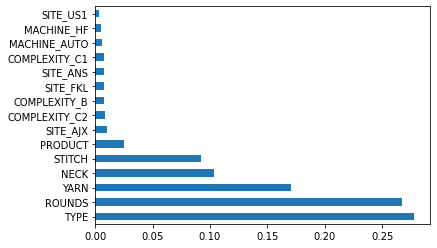

In [410]:
X = df.iloc[:,0:15]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

# Classifiers
Will do train test split and prepare the data for classifiers using a test size of 30% and train size of 70%. Naive Bayes, Decision tree and support vector machine algorithm will be use.

In [411]:
#train test split, preparing the data for the classifier, we split the dataset into input and target
#splitting the data frame into 2, 1 for input and 1 for target
target = df['ORDER']
input = df.drop(['ORDER'],axis=1)

In [412]:
#checking the output 1 means converted into order and 0 means did not convert into order
target.value_counts()

0    4846
1     773
Name: ORDER, dtype: int64

We can see that only 13% of the sample converts into orders. This will be an issue and will cause a bias when the calssifiers will be used. This is a case of oversampling and SMOTE will be use to handle oversampling

In [413]:
#using SMOTE from imblearn library to handle oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
input_sm, target_sm = sm.fit_resample(input, target)
target_sm.value_counts()

1    4846
0    4846
Name: ORDER, dtype: int64

# Splitting the data into train and test

The first classifier used is the Naïve Bayes, the method used is Gaussian naïve bayes. Naïve bayes calculate probabilities independently but this is not always the case in the reality. There may be more than one dependencies affecting the results.

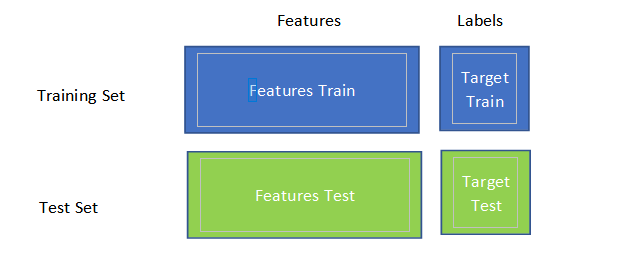

In [414]:
#train test split, preparing the data for the classifier
from sklearn.model_selection import train_test_split
features_train,features_test,target_train,target_test=train_test_split(input,target,test_size = 0.30,random_state=56)

In [415]:
#checking ratio, of data that will be tested
len(target_test)

1686

In [416]:
#checking ratio, of data that will be trained
len(target_train)

3933

# Using Gaussian Naive Bayes Classifier

In [417]:
#now I will create the naive bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnbmodel = gnb.fit(features_train, target_train)


preds_gnb = gnb.predict(features_test)
print(preds)

[0 0 0 ... 0 0 0]


Calculating accuracy using Naive Bayes Classifier

In [418]:
#Calculating and displaying the accuracy score of the model 
from sklearn.metrics import accuracy_score

print(accuracy_score(target_test,preds_gnb))

0.8327402135231317


In [419]:
#precision to predict that we are getting the order is quite low
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(target_test,preds_gnb))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1445
           1       0.43      0.54      0.48       241

    accuracy                           0.83      1686
   macro avg       0.68      0.71      0.69      1686
weighted avg       0.85      0.83      0.84      1686



Text(69.0, 0.5, 'Truth')

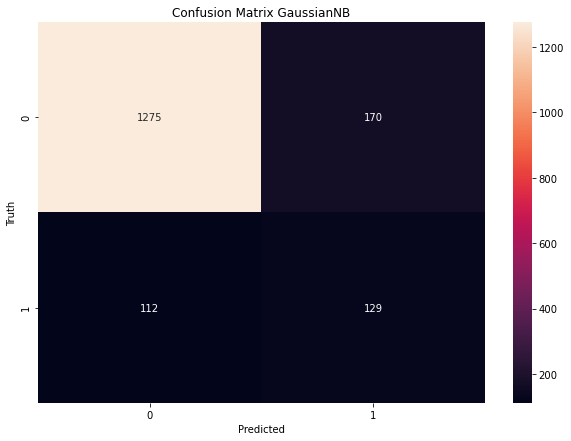

In [420]:
cm = confusion_matrix(target_test,preds_gnb)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix GaussianNB')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Categorical Gaussian Naives Bayes

Categorical Naive Bayes is another method of Naïve Bayes. It is more efficient in dealing with categorical features.

In [457]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnbmodel = cnb.fit(features_train, target_train)
preds_cnb = cnb.predict(features_test)
print(preds_cnb)

[0 0 0 ... 0 1 0]


In [422]:
#Calculating and displaying the accuracy score of the model 
from sklearn.metrics import accuracy_score

print(accuracy_score(target_test,preds_cnb))

0.8600237247924081


In [458]:
pred_train = cnb.predict(features_train)
pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [423]:
#precision to predict order is still quite low
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(target_test,preds_cnb))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1445
           1       0.53      0.22      0.31       241

    accuracy                           0.86      1686
   macro avg       0.70      0.59      0.61      1686
weighted avg       0.83      0.86      0.83      1686



Text(69.0, 0.5, 'Truth')

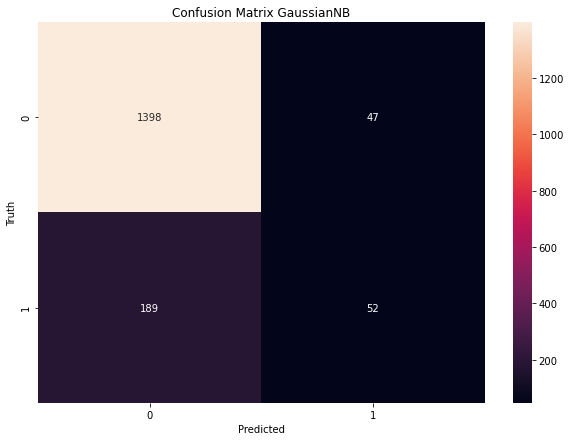

In [424]:
cm = confusion_matrix(target_test,preds_cnb)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix GaussianNB')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Decision tree classifier

Another classifier is the Decision tree classifier. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. Prediction is made by recursively taking decisions until it is not possible to explore another node. In our scenario it will work like, is sample type approval or counter, if approval does it require 2 rounds, if second round done, does it turn into an order, yes or no? 

In [425]:
#using decision tree classifier to do prediction
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtcmodel = dtc.fit(features_train, target_train)
preds_dtc = dtc.predict(features_test)
print(preds_dtc)

[1 0 0 ... 0 0 1]


In [426]:
#Calculating and displaying the accuracy score of the model 
from sklearn.metrics import accuracy_score

print(accuracy_score(target_test,preds_dtc))

0.833926453143535


In [427]:
#precision to predict that we are getting the order is quite low
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(target_test,preds_dtc))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1445
           1       0.40      0.33      0.36       241

    accuracy                           0.83      1686
   macro avg       0.65      0.62      0.63      1686
weighted avg       0.82      0.83      0.83      1686



Text(69.0, 0.5, 'Truth')

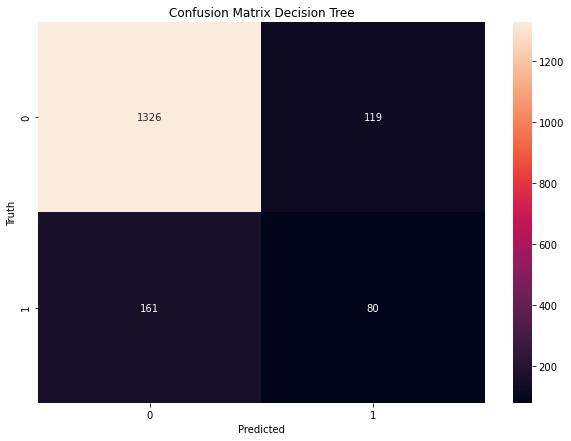

In [428]:
#confusion matrix for decision tree
cm = confusion_matrix(target_test,preds_dtc)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Support Vector Machine Algorithm

Support vector machine classifier creates a hyper plane and it separates the data based on output defined. In my case SVM did not provide much improvement.

In [444]:
#Import svm model
from sklearn.svm import SVC
#Create a svm Classifier
svm=SVC()
#Train the model using the training sets
svc_model = svm.fit(features_train, target_train)
preds_svm=model.predict(features_test)
print(preds_svm)

[1 0 0 ... 0 0 0]


In [445]:
#Calculating and displaying the accuracy score of the model 
from sklearn.metrics import accuracy_score

print(accuracy_score(target_test,pred_svm))

0.8505338078291815


In [446]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(target_test,pred_svm))

print(classification_report(target_test, pred_svm))

[[1354   91]
 [ 161   80]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1445
           1       0.47      0.33      0.39       241

    accuracy                           0.85      1686
   macro avg       0.68      0.63      0.65      1686
weighted avg       0.83      0.85      0.84      1686



Text(69.0, 0.5, 'Truth')

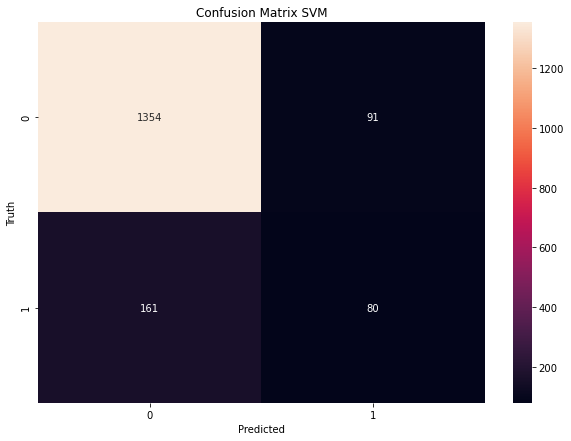

In [447]:
#confusion matrix for SVM
cm = confusion_matrix(target_test,pred_svm)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# ROC Curves

Receiver Operating Characteristic Curve plots false positive rate (x-axis) against true positive rate (y-axis). This curve is useful as we can see clearly the difference of prediction between the different models.

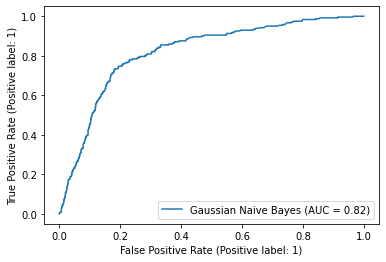

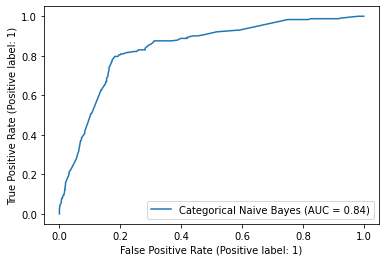

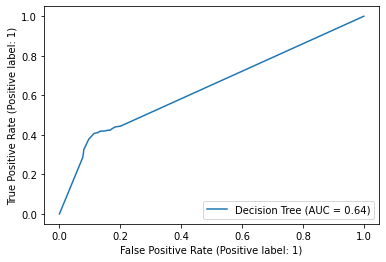

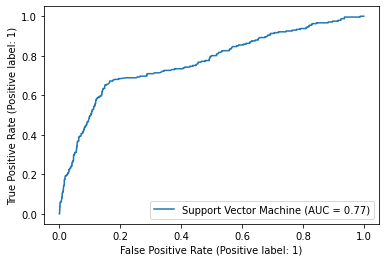

In [448]:
# Use sklearn to plot ROC curves

from sklearn.metrics import plot_roc_curve

plot_roc_curve(gnb, features_test, target_test, name = 'Gaussian Naive Bayes')
plot_roc_curve(cnb, features_test, target_test, name = 'Categorical Naive Bayes')
plot_roc_curve(dtc, features_test, target_test, name = 'Decision Tree')
plot_roc_curve(svm, features_test, target_test, name = 'Support Vector Machine')


# Precision-Recall Curves
Recall is the actual positive cases that were correctly identitfied

Text(0.5, 1.0, 'SVM: 2-class Precision-Recall curve: AP=0.23')

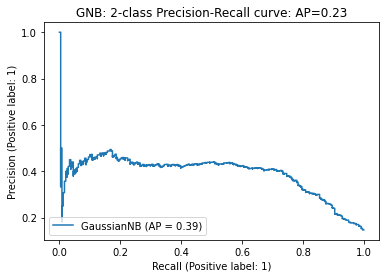

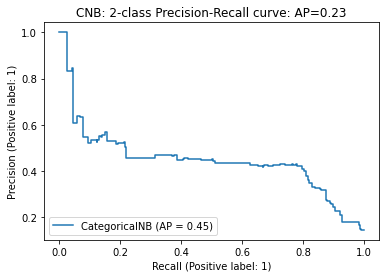

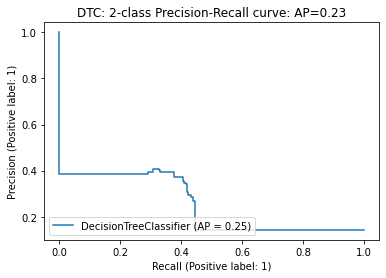

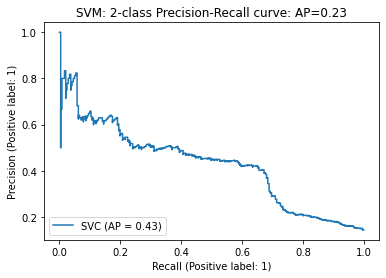

In [449]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt


disp = plot_precision_recall_curve(gnb, features_test, target_test)
disp.ax_.set_title('GNB: 2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(cnb, features_test, target_test)
disp.ax_.set_title('CNB: 2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


disp = plot_precision_recall_curve(dtc, features_test, target_test)
disp.ax_.set_title('DTC: 2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


disp = plot_precision_recall_curve(svm, features_test, target_test)
disp.ax_.set_title('SVM: 2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


Text(0, 0.5, 'Predictions')

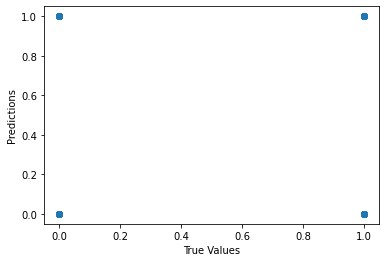

In [453]:
## The line / model
plt.scatter(target_test, preds_cnb)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Overfitting and Underfitting

Overfitting - Machine tries to learn details with noise and will fail to predict new data points. Data need to be cleaned to avoid over fitting. Some reasons of overfitting can be that the model is too complex, not enough data and high variance in model. 

Underfitting - scenario where machine cannot learn and predict and will accept everything when doing predictions. Data need to be cleaned to avoid under fitting. Reasons for underfitting is high bias in model, mode is too simple and size of training data not enough.

In [461]:
#checking if any case of overfitting on naive bayes classification
#if there is overfitting the value accuracy on test data would have been much lower on test data compared to train accuracy
print('Accuracy score on training data',accuracy_score(target_train,pred_train))
print('Accuracy score on test data',accuracy_score(target_test,preds_cnb))

Accuracy score on training data 0.8654970760233918
Accuracy score on test data 0.8600237247924081


In [509]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# prepare cross validation
kfold = KFold(3)
# enumerate splits
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (data[train], data[test]))

train: [0.3 0.4 0.5 0.6], test: [0.1 0.2]
train: [0.1 0.2 0.5 0.6], test: [0.3 0.4]
train: [0.1 0.2 0.3 0.4], test: [0.5 0.6]


Text(0, 0.5, 'Predictions')

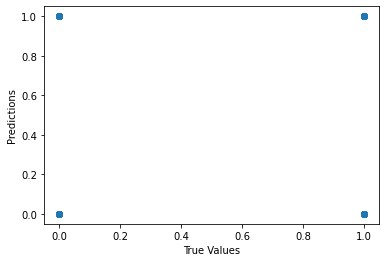

In [510]:
## The line / model
plt.scatter(target_test, preds_cnb)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [511]:
print ('Score:', model.score(features_test, target_test))

Score: 0.8629893238434164


In [515]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [517]:
# Perform 6-fold cross validation
scores = cross_val_score(dtcmodel, input, target, cv=10)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.79359431 0.83274021 0.83096085 0.85231317 0.82740214 0.84697509
 0.85231317 0.81494662 0.81316726 0.84313725]


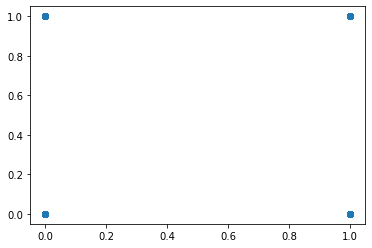

In [518]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

##You can see it’s very different from the original plot from earlier. 
##It is six times as many points as the original plot because I used cv=6.

Text(0, 0.5, 'Predictions')

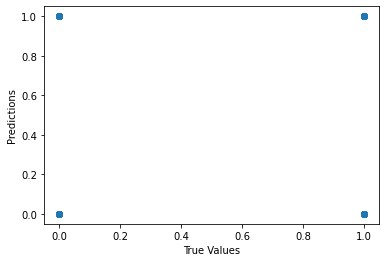

In [483]:
from sklearn.linear_model import LogisticRegression
# fit a model
lr = LogisticRegression()
model = lr.fit(features_train, target_train)
predictions = lr.predict(features_test)

## The line / model
plt.scatter(target_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [485]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import  KFold
from sklearn import metrics

In [489]:
kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [491]:
#kfold will make 3 splits
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9,10]):
    print(train_index,test_index)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [492]:
#generic function to get score
def get_score(model,features_train,features_test,target_train,target_test):
    model.fit(features_train,target_train)
    return model.score(features_test,target_test)

In [494]:
#test function with categorical data
get_score(CategoricalNB(),features_train,features_test,target_train,target_test)

0.8600237247924081

In [495]:
#stratified k folds, will divide each classification category in a uniform way
from sklearn.model_selection import StratifiedKFold
folds =

In [502]:
#prepare array to use KFolds
scores_cnb = []
for train_index,test_index in kf.split(df.order):
       features_train,features_test,target_train,target_test = target.order[train_index],target.order[test_index], \
                                                               target.target[train_index], target.target[test_index]#target_train

AttributeError: 'DataFrame' object has no attribute 'order'

# Discussion



References : 

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

https://sinyi-chou.github.io/python-sklearn-precision-recall/


